In [1]:
### Demo for converting the signals to spectograms



In [2]:
import os
import tensorflow as tf



In [13]:
## First we get a list of all the files

data_dir_ref = '../data/training'

classes = [d for d in os.listdir(data_dir_ref)]
classes

['Gunshot', 'Other', 'Rumble']

In [139]:
example_file_ref = '../data/training/Gunshot/0/0.wav'

In [140]:
from scipy.io import wavfile
sample_rate, data = wavfile.read(example_file_ref)

In [141]:
import IPython.display as ipd
display(ipd.Audio(data, rate=sample_rate))

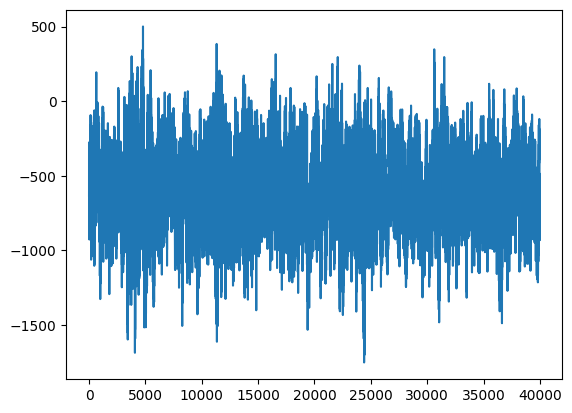

In [142]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()


In [143]:
mult_factor = len(data) * 0.01
mult_factor

400.0

In [180]:
len(data)/sample_rate

6.027

(257, 496)


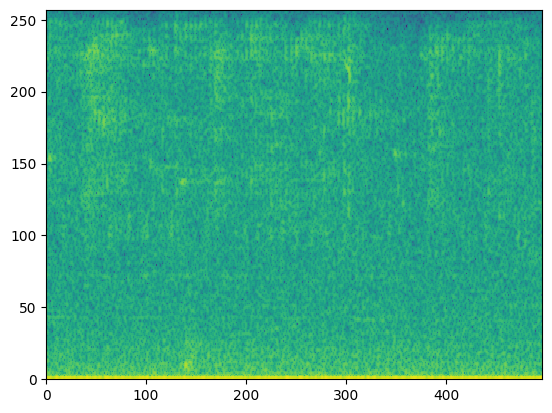

In [145]:
import numpy as np
import math
spec = tf.signal.stft(data.astype('float64'), frame_length = math.ceil((len(data) * 0.01)), frame_step = int(sample_rate*0.01)).numpy().T
plt.figure()
plt.pcolormesh(np.log10(np.abs(spec)));
print(spec.shape)

In [113]:
type(spec)

numpy.ndarray

In [114]:
spec

array([[-1.15640148e+05+0.00000000e+00j, -1.24007364e+05+0.00000000e+00j,
        -1.33714708e+05+0.00000000e+00j, ...,
        -9.47444923e+04+0.00000000e+00j, -1.20334758e+05+0.00000000e+00j,
        -1.46977914e+05+0.00000000e+00j],
       [ 5.60319504e+04+4.62647661e+04j,  7.02777663e+04+4.31364160e+04j,
         7.28806065e+04+5.81263388e+04j, ...,
         5.04308420e+04+2.67658764e+04j,  7.54560615e+04+3.52271374e+04j,
         8.61566066e+04+5.61709564e+04j],
       [ 6.90481761e+03-6.95273257e+03j, -2.02548837e+04-1.44496345e+04j,
        -1.50713626e+03-2.62080418e+04j, ...,
        -1.28675602e+04+1.48038565e+03j, -1.81762071e+04-1.58047068e+04j,
        -1.54400984e+04-2.51190793e+04j],
       ...,
       [-9.05654422e+02-2.36913822e+02j,  1.62588765e+02+1.99141004e+02j,
         1.51553882e+02+1.52742989e+02j, ...,
        -1.37065635e+02+1.11662274e+02j,  7.13630480e+01-4.78365105e+01j,
        -1.75567706e+02+9.29420958e+01j],
       [-1.48850663e+02+7.06488763e+02j,  9.

In [118]:
from PIL import Image

def scale_minmax(X, min=0.0, max=255.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled
X = np.log10(np.abs(spec))
X_scaled = scale_minmax(X)
im = Image.fromarray(X_scaled)
rgb_im = im.convert('RGB')
rgb_im.save("your_file.jpeg")

In [119]:
X_scaled

array([[244.26849473, 245.8312512 , 247.51726438, ..., 239.81005552,
        245.1587154 , 249.63293335],
       [233.87420299, 236.70355251, 239.44754107, ..., 228.4795672 ,
        236.9232106 , 241.64642266],
       [189.05304106, 209.89864112, 211.09820022, ..., 195.29490375,
        209.17293902, 213.69686015],
       ...,
       [136.5210763 , 107.61048917, 103.62930213, ...,  99.23431064,
         83.09079878, 101.84216612],
       [130.71078334,  89.89836365, 112.708771  , ...,  92.05600237,
         77.17012284,  96.61513205],
       [130.51861093, 110.753998  , 114.10201657, ...,  74.48103257,
         88.72498131,  98.40012638]])

In [175]:
from tqdm import tqdm

for c in classes:
    class_data_ref = data_dir_ref + f'/{c}'
    subdirs = [d for d in os.listdir(class_data_ref)]
    
    for subdir in tqdm(subdirs):
        subdir_ref = class_data_ref + f'/{subdir}'
        file_names = [file_ref for file_ref in os.listdir(subdir_ref)]
        file_refs = [subdir_ref +f'/{file_name}' for file_name in file_names]
        
        specs = {}
        #Here we load several files add the same time:
        for file_ref, file_name in zip(file_refs[:100], file_names[:100]):
            
            sample_rate, data = wavfile.read(file_ref)
            spec = tf.signal.stft(data.astype('float64'), frame_length = math.ceil((len(data) * 0.01)), frame_step = int(sample_rate*0.01)).numpy().T
            # Save as spectogram
            
            specs[file_name[:-4]] = np.log10(np.abs(spec))

        target_file = f'../data/preprocessed/spectograms/training/{c}/{subdir}'
        #os.makedirs(new_dir, exist_ok=True)
        np.savez_compressed(new_dir, **specs)
        

    

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:02<00:00,  2.24it/s]


ValueError: File format b'\x89PNG' not understood. Only 'RIFF' and 'RIFX' supported.

In [176]:
## Read it back
example_spec = '../data/preprocessed/spectograms/training/Gunshot/0.npz'
specs = np.load(example_spec)


In [177]:
specs['0']

array([[3.40152792, 3.2787533 , 2.8299477 , ..., 3.11362051, 3.28727011,
        3.50805049],
       [3.7182756 , 3.51999429, 3.44131463, ..., 3.48273537, 3.4087851 ,
        3.36841648],
       [3.60296203, 3.64998417, 3.66266103, ..., 3.53327727, 3.3838037 ,
        1.93472498],
       ...,
       [2.35207372, 1.87700269, 2.35830381, ..., 2.59534567, 2.40628829,
        2.25990517],
       [2.41906386, 2.30274095, 2.2940264 , ..., 1.86733204, 2.49004598,
        2.53046678],
       [2.4660251 , 1.93803902, 2.21580105, ..., 2.34276509, 2.5104252 ,
        2.78381049]])

(129, 496)


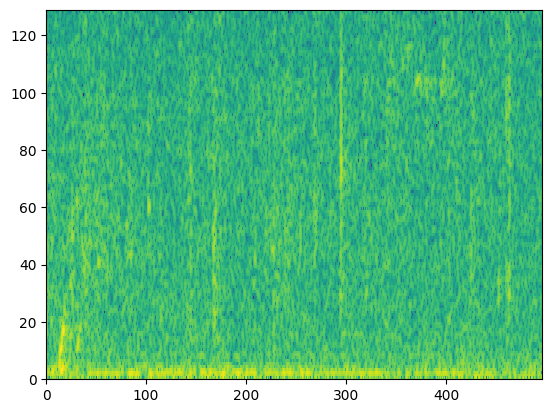

In [178]:
plt.figure()
plt.pcolormesh(specs['0']);
print(specs['0'].shape)

In [179]:
specs.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x000001B67AB97610>)